# Plotting example

In [2]:
from gawain.io import HDFReader

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [74]:
data = Reader('../runs/mhd_rotor')

In [75]:
data.variables

['density',
 'xmomentum',
 'ymomentum',
 'zmomentum',
 'energy',
 'xmag',
 'ymag',
 'zmag']

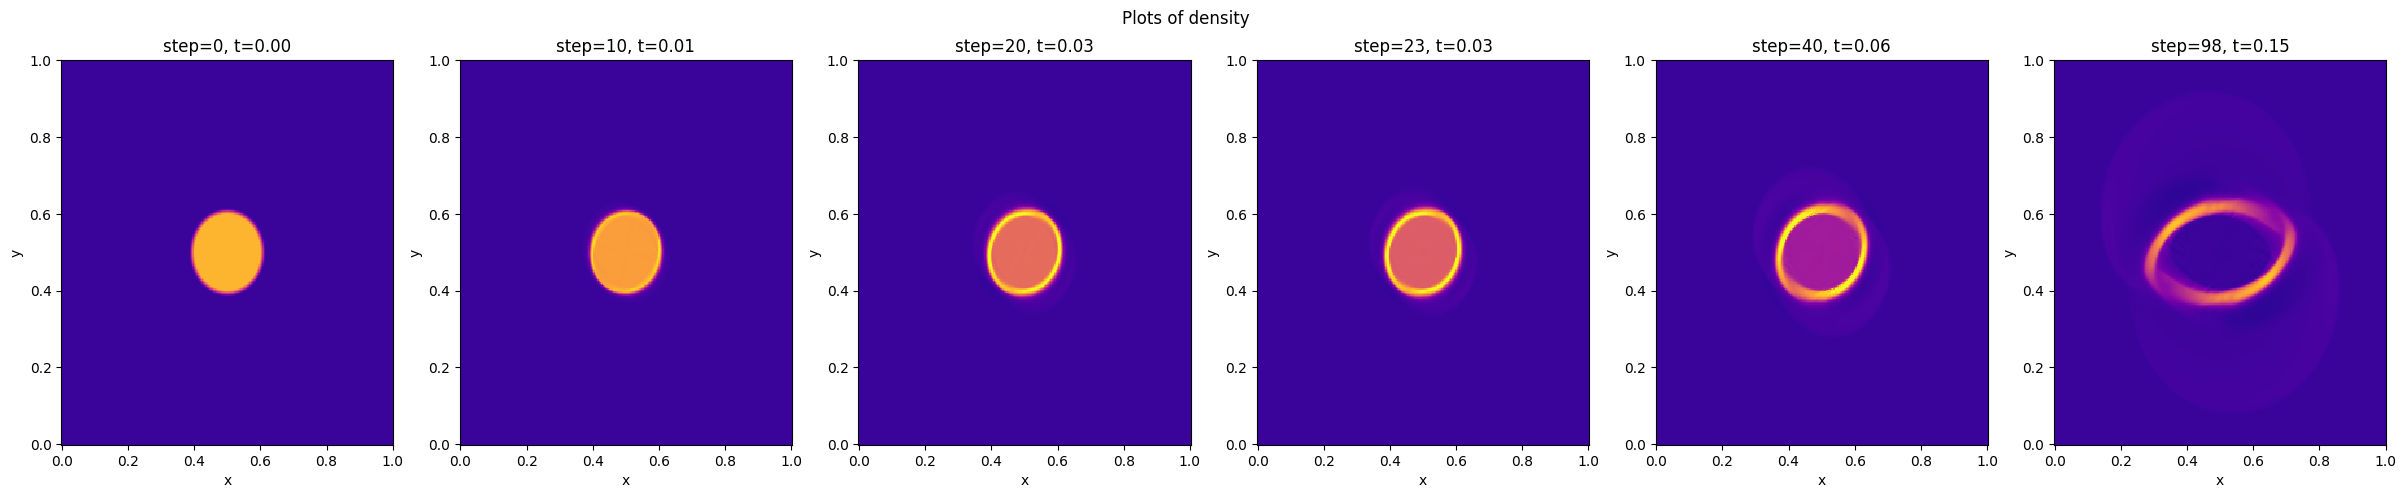

In [76]:
data.plot('density', timesteps=[0,10,20,23,40,98], vmin=0, vmax=12)

In [77]:
raw_data = data.get_data('density')

In [78]:
shape = (256,256)

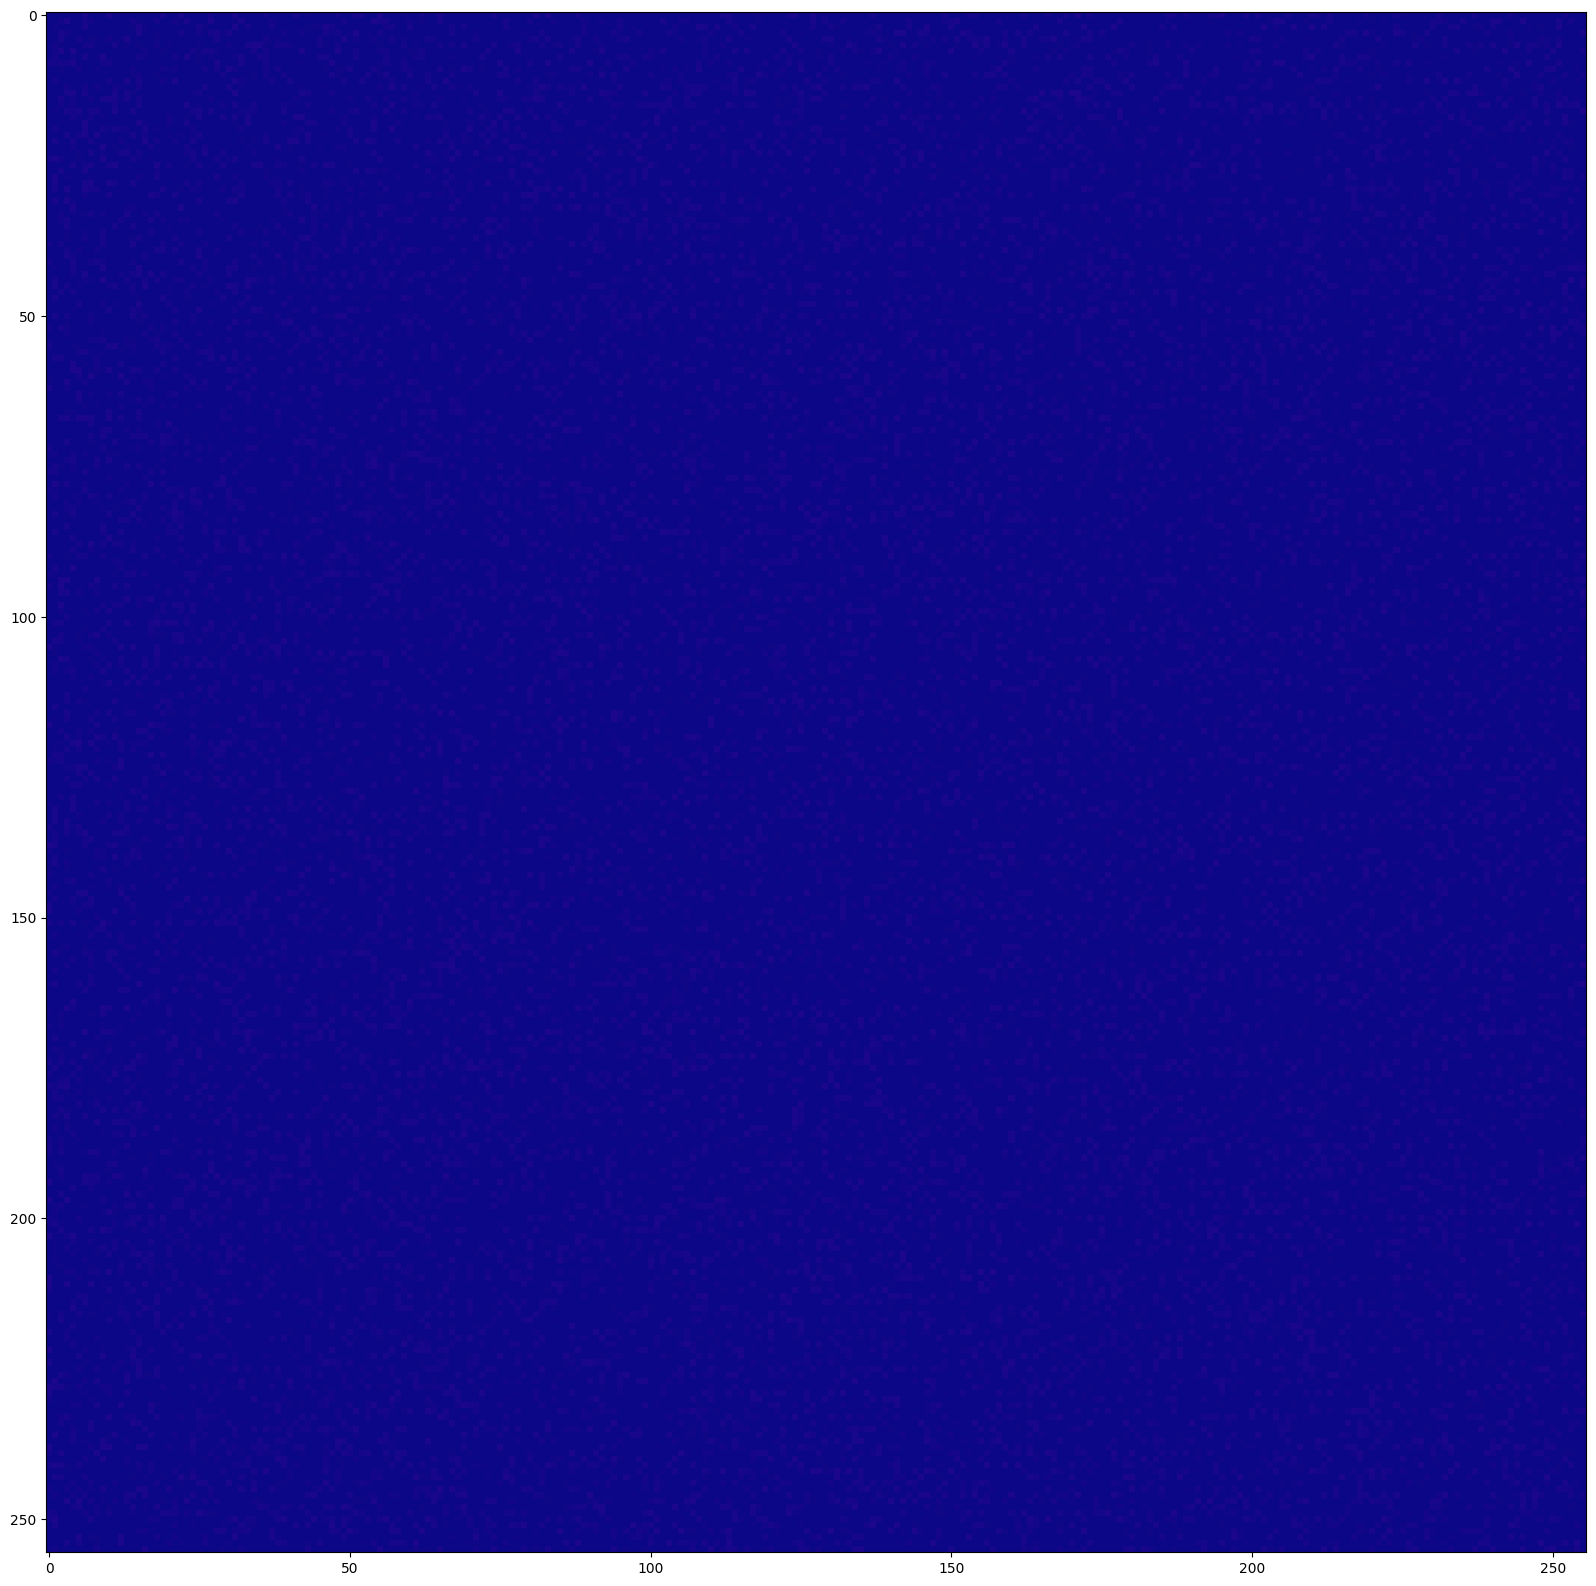

In [79]:
fig, ax = plt.subplots(figsize=(20,20))

image = ax.imshow(np.random.random(shape), vmin=raw_data.min(), vmax=raw_data.max(), cmap="plasma")

In [80]:
# initialization function: plot the background of each frame
def init():
    image.set_data(np.random.random(shape))
    return (image,)

In [81]:
# animation function. This is called sequentially
def animate(i):
    y = raw_data[i].reshape(shape)
    image.set_data(y)
    return (image,)


In [82]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=99, interval=10, 
                               blit=True)

In [83]:
HTML(anim.to_jshtml())

In [8]:
data = HDFReader('../runs/sod_shock_tube.h5')

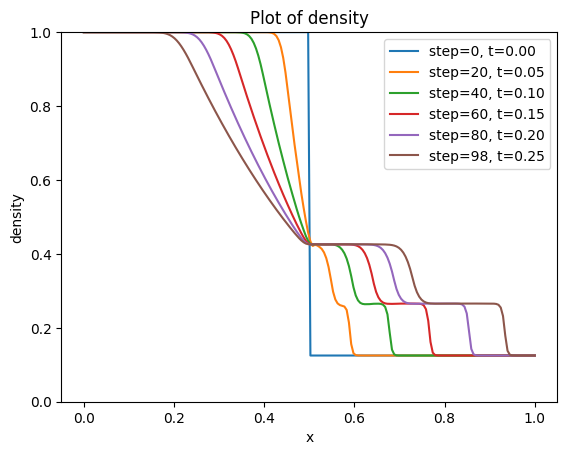

In [9]:
data.plot('density', timesteps=[0,20,40,60,80,98], vmin=0, vmax=1)

In [5]:
raw_data = data.get_data('density')

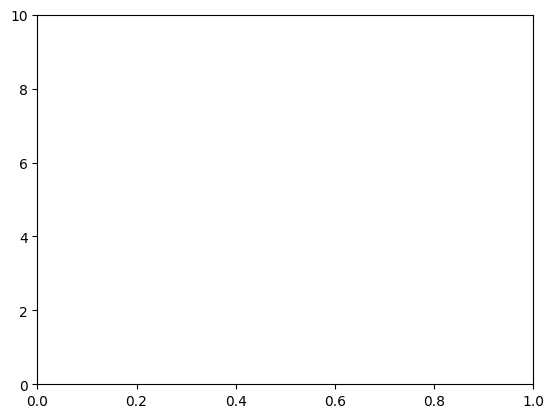

In [47]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((0, 10))

line, = ax.plot([], [], lw=2)

In [48]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [49]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 1, 512)
    y = np.squeeze(raw_data[i])
    line.set_data(x, y)
    return (line,)


In [50]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [51]:
HTML(anim.to_jshtml())